In [561]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import LineString as ls
from scipy.optimize import curve_fit
from scipy.signal import find_peaks,peak_widths
import scipy.constants as con
from scipy.integrate import quad
from scipy import stats
e = 2.718281828
import csv

# Load Data

In [562]:
ne1 = pd.read_csv("Data/FH/Ne1.csv",sep=',',decimal=".",skiprows=1)
ne2 = pd.read_csv("Data/FH/Ne2.csv",sep=',',decimal=".",skiprows=1)
ne = [ne1,ne2]

hg1 = pd.read_csv("Data/FH/Hg1.csv",sep=',',decimal=".",skiprows=1)
hg2 = pd.read_csv("Data/FH/Hg2.csv",sep=',',decimal=".",skiprows=1)
hg3 = pd.read_csv("Data/FH/Hg3.csv",sep=',',decimal=".",skiprows=1)
hg4 = pd.read_csv("Data/FH/Hg4.csv",sep=',',decimal=".",skiprows=1)
hg = [hg1,hg2,hg3,hg4]

T =[160,170,180,190]
uT = 1
d = 1.1/100
ud = 0.1/100
um= 0.3
colors = ["tab:blue","tab:orange","tab:green","tab:red"]

ne1

,Second,Volt,Volt.1,Unnamed: 3
0,0.000002,2.48,1.76,NaN
1,0.007326,2.48,1.76,NaN
2,0.014650,2.48,1.76,NaN
3,0.021975,2.48,1.76,NaN
4,0.029299,2.48,1.76,NaN
...,...,...,...,...
4699,34.416504,14.64,11.20,NaN
4700,34.423828,14.16,11.04,NaN
4701,34.431152,14.48,11.20,NaN
4702,34.438477,14.08,11.04,NaN


# Neon

251
[ 43  52  66  76  80  90  92  94  98 104 110 251]
51
[51]


(-1.0, 12.0)

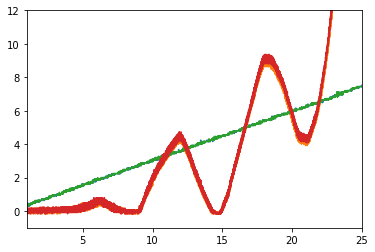

In [563]:
for x in ne:
    # plt.plot(x["Second"],x["Volt"])
    peaks , _ = find_peaks(x["Volt"][:1000],prominence=0.5) 
    # plt.scatter(0, x["Volt"][peaks[len(peaks)-1]],c="k")
    print(peaks[len(peaks)-1])
    print(peaks)
    plt.plot(x["Second"]-x["Second"][peaks[len(peaks)-1]],x["Volt"])
    plt.plot(x["Second"]-x["Second"][peaks[len(peaks)-1]],x["Volt.1"])

axes = plt.gca()
axes.set_xlim(1,25)
axes.set_ylim(-1,12)

8 2.42
9.1 2.75
14.4 4.32
14.9 4.47
20.5 6.13
21.15 6.32


(-1.0, 15.0)

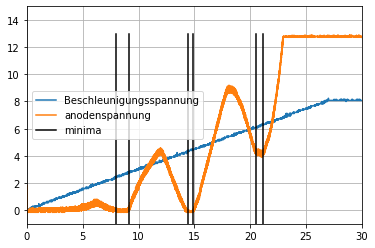

In [564]:
x=ne1
# plt.plot(x["Second"],x["Volt"])
peaks , _ = find_peaks(x["Volt"][:1000],prominence=0.5) 
# peaks2 , _ = find_peaks(-x["Volt.1"],height=-6,prominence=2,distance=10) 
a=400
b=3900
# plt.scatter(x["Volt"][peaks2],x["Volt.1"][peaks2],c="k")
# print(peaks[len(peaks)-1])
# print(x["Volt"][peaks2])
plt.plot(x["Second"]-x["Second"][peaks[len(peaks)-1]],x["Volt"])
plt.plot(x["Second"]-x["Second"][peaks[len(peaks)-1]],x["Volt.1"])
# plt.plot(x["Second"][a:b],x["Volt"][a:b])
# plt.plot(x["Second"][a:b],x["Volt.1"][a:b])
# plt.plot(x["Volt"][a:b],x["Volt.1"][a:b])

# minima=[14.68,20.9]
neben_minima = [8,9.1,14.4,14.9,20.5,21.15]
energie =[2.43]

# for m in minima:
#     plt.plot([m,m],[-1,10],c="k")

   
    
def fit(x,m,c):
    return m*x +c
i = x["Second"][a:b]-x["Second"][peaks[len(peaks)-1]]
j = x["Volt"][a:b]
# plt.plot(i,j)

c, cov = curve_fit(fit, i,j)
perr = np.sqrt(np.abs(np.diag(cov)))
# print(c,perr)
xf = np.linspace(0,30,500)
yf = fit(xf, c[0],c[1],)
# plt.plot(xf,yf, label="fit")
for n in neben_minima:
    plt.plot([n,n],[-1,13],c="k") 
    print(n,round(fit(n,c[0],c[1]),2))

plt.grid()
plt.legend(["Beschleunigungsspannung","anodenspannung","minima"])

axes = plt.gca()
axes.set_xlim(0,30)
axes.set_ylim(-1,15)
# axes.set_xlim(7,10)
# axes.set_ylim(2,3)

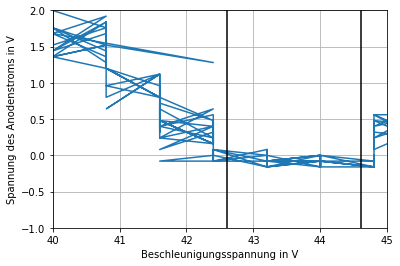

In [595]:
x=ne1
# plt.plot(x["Second"],x["Volt"])
# peaks , _ = find_peaks(x["Volt"][:1000],prominence=0.5) 
# peaks2 , _ = find_peaks(-x["Volt.1"],height=-6,prominence=2,distance=10) 
a=270
b=3900
w = 1
# plt.scatter(x["Volt"][peaks2],x["Volt.1"][peaks2],c="k")
# print(peaks[len(peaks)-1])
# print(x["Volt"][peaks2])
# plt.plot(x["Second"]-x["Second"][peaks[len(peaks)-1]],x["Volt"])
# plt.plot(x["Second"]-x["Second"][peaks[len(peaks)-1]],x["Volt.1"])
# plt.plot(x["Second"][a:b],x["Volt"][a:b])
# plt.plot(x["Second"][a:b],x["Volt.1"][a:b])
plt.plot(10*x["Volt"][a:b].rolling(window=w).mean(),x["Volt.1"][a:b].rolling(window=w).mean(),label=f"{T[0]}°C")     
# plt.plot(10*x["Volt"][a:b],x["Volt.1"][a:b],label=f"{t} Grad C")       

# minima=[14.68,20.9]
neben_minima = [2.59,2.79,4.26,4.46,6.10,6.31]

# for m in minima:
#     plt.plot([m,m],[-1,10],c="k")

   
    
# def fit(x,m,c):
#     return m*x +c
# i = x["Second"][a:b]-x["Second"][peaks[len(peaks)-1]]
# j = x["Volt"][a:b]
# # plt.plot(i,j)

# c, cov = curve_fit(fit, i,j)
# perr = np.sqrt(np.abs(np.diag(cov)))
# # print(c,perr)
# xf = np.linspace(0,30,500)
# yf = fit(xf, c[0],c[1],)
# plt.plot(xf,yf, label="fit")
for n in neben_minima:
    plt.plot([10*n,10*n],[-1,15],c="k") 
    # print(n,round(fit(n,c[0],c[1]),2))
un=.8

plt.grid()
# plt.legend(["anodenspannung","Beschleunigungsspannung","minima"])
plt.xlabel("Beschleunigungsspannung in V")
plt.ylabel("Spannung des Anodenstroms in V")

axes = plt.gca()
# axes.set_xlim(20,30)
# axes.set_ylim(-1,2)

axes.set_xlim(40,45)
axes.set_ylim(-1,2)

# axes.set_xlim(59,65)
# axes.set_ylim(3.5,5)

# axes.set_xlim(0,80)
# axes.set_ylim(-1,13.5)

plt.savefig("Bilder/fh/Neon.png",dpi=300)

In [593]:
rows = [[]*4]*2
nmpos=["links","rechts"]
for i,nmlab in enumerate(nmpos):
    xlab = nmlab
    x1 = "\SI{" + str(10*neben_minima[i]) + " \pm " +  str(un) + r"}{\volt}"
    x2 = "\SI{" + str(10*neben_minima[i+2]) + " \pm " +  str(un) + r"}{\volt}"
    x3 = "\SI{" + str(10*neben_minima[i+3]) + " \pm " +  str(un) + r"}{\volt}"
    rows[i] = [xlab,x1,x2,x3]
    print(x1)
    
fields= ["Nebenminima", "Erste Ordnung", "Zweite Ordnung", "Dritte Ordnung"]

filename = "Bilder/fh/ne-nebenminima.csv"

with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(rows)

print(rows[1])

\SI{25.9 \pm 0.8}{\volt}
\SI{27.9 \pm 0.8}{\volt}
['rechts', '\\SI{27.9 \\pm 0.8}{\\volt}', '\\SI{44.6 \\pm 0.8}{\\volt}', '\\SI{61.0 \\pm 0.8}{\\volt}']


(-5.0, 135.0)

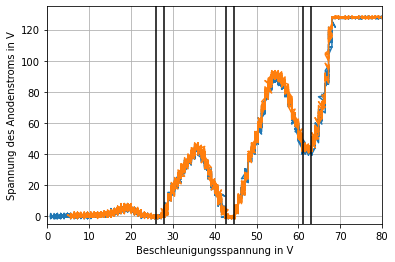

In [567]:
x=ne1
# plt.plot(x["Second"],x["Volt"])
# peaks , _ = find_peaks(x["Volt"][:1000],prominence=0.5) 
# peaks2 , _ = find_peaks(-x["Volt.1"],height=-6,prominence=2,distance=10) 
a=270
b=3900
# plt.scatter(x["Volt"][peaks2],x["Volt.1"][peaks2],c="k")
# print(peaks[len(peaks)-1])
# print(x["Volt"][peaks2])
# plt.plot(x["Second"]-x["Second"][peaks[len(peaks)-1]],x["Volt"])
# plt.plot(x["Second"]-x["Second"][peaks[len(peaks)-1]],x["Volt.1"])
# plt.plot(x["Second"][a:b],x["Volt"][a:b])
# plt.plot(x["Second"][a:b],x["Volt.1"][a:b])
for x,t in zip(ne,T):
    x1 = 10*x["Volt"][a:b].rolling(window=w).mean()
    x2 = 10*x["Volt"][a:b]
    y1 = 10*x["Volt.1"][a:b].rolling(window=w).mean()
    y2 = 10*x["Volt.1"][a:b]
    # plt.plot(x1,y1,label=f"{t} Grad C") 
    plt.plot(x2,y2,label=f"{t}°C") 
    

# minima=[14.68,20.9]
# neben_minima = [2.25,2.7,4.25,4.45,6.1,6.3]

# for m in minima:
#     plt.plot([m,m],[-1,10],c="k")

   
    
# def fit(x,m,c):
#     return m*x +c
# i = x["Second"][a:b]-x["Second"][peaks[len(peaks)-1]]
# j = x["Volt"][a:b]
# # plt.plot(i,j)

# c, cov = curve_fit(fit, i,j)
# perr = np.sqrt(np.abs(np.diag(cov)))
# # print(c,perr)
# xf = np.linspace(0,30,500)
# yf = fit(xf, c[0],c[1],)
# plt.plot(xf,yf, label="fit")
for n in neben_minima:
    plt.plot([10*n,10*n],[-10,140],c="k") 
    # print(n,round(fit(n,c[0],c[1]),2))

plt.grid()
# plt.legend(["anodenspannung","Beschleunigungsspannung","minima"])
plt.xlabel("Beschleunigungsspannung in V")
plt.ylabel("Spannung des Anodenstroms in V")

axes = plt.gca()
# axes.set_xlim(60,68)
# axes.set_ylim(3,5)
axes.set_xlim(0,80)
axes.set_ylim(-5,135)

## Bestimmung wellenlänge

In [568]:
nml = [0]*3
nmr = [0]*3
for i in range(3):
    nml[i] = 10*neben_minima[2*i]
    nmr[i] = 10*neben_minima[2*i+1]
nml,nmr

([25.9, 42.599999999999994, 61.0], [27.9, 44.6, 63.099999999999994])

In [569]:
uE = 2*um**2

for i in range(3):
    E = 10* (neben_minima[2*i+1]-neben_minima[2*i])
    l = con.h*con.c/(E * con.e)
    ul = ue*con.h*con.c/(E**2 * con.e)
    print(round(l*1e9,3),round(ul*1e9,3)) 
#wtf warum passen die werte so gut das sind ganz andere werte

619.921 55.793
619.921 55.793
590.401 50.606


In [570]:
E1 = 0
E2 = 0
uE=2*um**2
energieniveaus = [0]*4
for i,m in enumerate(nml):
    temp=round(m-xl,3)
    if (i >0):
        print(temp)
        energieniveaus[i-1]=temp
    if (i==1):
        E1 += temp
    if (i==2):
        E2 += temp
    xl = m

for i,m in enumerate(nmr):
    temp=round(m-xl,3)
    if (i >0):
        print(temp)
        energieniveaus[i+1]=temp
    if (i==1):
        E1 += temp
    if (i==2):
        E2 += temp
    xl = m


16.7
18.4
16.7
18.5


In [594]:
rows = [[]*3]*2
nmpos=[r"Ordnumg 1 $\to$ 2",r"Ordnumg 2 $\to$ 3"]
for i,nmlab in enumerate(nmpos):
    xlab = nmlab
    x1 = "\SI{" + str(energieniveaus[i]) + " \pm " +  str(2*um**2) + r"}{e\volt}"
    x2 = "\SI{" + str(energieniveaus[i+2]) + " \pm " +  str(2*um**2) + r"}{e\volt}"
    rows[i] = [xlab,x1,x2]
    print(x1)
    
fields= [" ", "links", "rechts"]

filename = "Bilder/fh/ne-Energieniveaus.csv"

with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(rows)

print(rows[1])

\SI{16.7 \pm 0.18}{e\volt}
\SI{18.4 \pm 0.18}{e\volt}
['Ordnumg 2 $\\to$ 3', '\\SI{18.4 \\pm 0.18}{e\\volt}', '\\SI{18.5 \\pm 0.18}{e\\volt}']


In [572]:
nm = np.add(nml,nmr)
for i,m in enumerate(nm):
    if (i >0):
        print(round(m-xl,3))
    if (i==1):
        E1 = round(m-xl,3)
    if (i==2):
        E2 = round(m-xl,3)
    xl = m
    
E = E2-E1
uE = 4*um**2

l = con.h*con.c*2/(E * con.e)*1e9
ul = uE*con.h*con.c*2/(E**2 * con.e)*1e9
#faktor 2 daneben
l,ul

33.4
36.9


(708.4811339040015, 72.87234520155442)

In [573]:
uE = 4*um**2

for i,m in enumerate(nml):
    if (i==1):
        E1 = round(m-xl,3)
    if (i==2):
        E2 = round(m-xl,3)
    xl = m

E = E2-E1
l = con.h*con.c/(E * con.e)*1e9
ul = uE*con.h*con.c/(E**2 * con.e)*1e9
print("\SI{" + str(round(l,1)) + " \pm " +  str(round(ul,1)) + r"}{\nano\m}", "\SI{" + str(round(E,3)) + " \pm " +  str(uE) + r"}{e\volt}")

for i,m in enumerate(nmr):
    if (i==1):
        E1 = round(m-xl,3)
    if (i==2):
        E2 = round(m-xl,3)
    xl = m
E = E2-E1
l = con.h*con.c/(E * con.e)*1e9
ul = uE*con.h*con.c/(E**2 * con.e)*1e9
print("\SI{" + str(round(l,1)) + " \pm " +  str(round(ul,1)) + r"}{\nano\m}", "\SI{" + str(round(E,3)) + " \pm " +  str(uE) + r"}{e\volt}")


\SI{729.3 \pm 154.4}{\nano\m} \SI{1.7 \pm 0.36}{e\volt}
\SI{688.8 \pm 137.8}{\nano\m} \SI{1.8 \pm 0.36}{e\volt}


# Quecksilber

## Minima suche

(-1.0, 29.0)

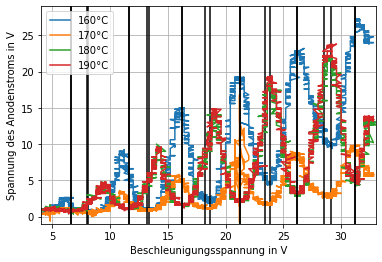

In [574]:
a=600
b=4700
w = 100
min1 = [8.1,13.4,18.6,23.8,29.1]
min2 = [8,13.2,18.2,23.4,28.5]
min3 = [6.6,11.6,16.2,21.2,26.2,31.2]
min4 = min3
minima = [min1,min2,min3,min4]
for x,t,m in zip(hg,T,minima):
    x1 = 10*x["Volt"][a:b].rolling(window=w).mean()
    x2 = 10*x["Volt"][a:b]
    y1 = 10*x["Volt.1"][a:b].rolling(window=w).mean()
    y2 = 10*x["Volt.1"][a:b]
    # plt.plot(x1,y1,label=f"{t} Grad C") 
    plt.plot(x2,y2,label=f"{t}°C") 

    # peaks , _ = find_peaks(-y1, prominence = 0.1)
    # print(x1[peaks + a])
    # # peaks2 , _ = find_peaks(-x["Volt.1"],height=-6,prominence=2,distance=10) 
    # plt.scatter(x2[peaks + a],y2[peaks + a] + 2)
    # plt.scatter(x2[peaks + a],-y2[peaks + a])

    # for p in peaks:
    #     plt.plot([x2[p + a],x2[p + a]],[0,20],c="k")
    for n in m:
        plt.plot([n,n],[-2,30],c="k") 

plt.grid()
plt.xlabel("Beschleunigungsspannung in V")
plt.ylabel("Spannung des Anodenstroms in V")
plt.legend()
axes = plt.gca()
axes.set_xlim(4,33)
axes.set_ylim(-1,29)

(-1.0, 29.0)

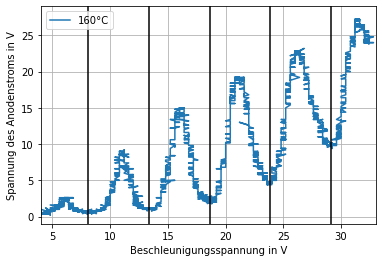

In [575]:
a=600
b=4700

pos = 0
x = hg[pos]
t = T [pos]
m = minima[pos]


x1 = 10*x["Volt"][a:b].rolling(window=w).mean()
x2 = 10*x["Volt"][a:b]
y1 = 10*x["Volt.1"][a:b].rolling(window=w).mean()
y2 = 10*x["Volt.1"][a:b]

plt.plot(x2,y2,label=f"{t}°C") 

for n in m:
    plt.plot([n,n],[-2,30],c="k") 

plt.grid()
plt.xlabel("Beschleunigungsspannung in V")
plt.ylabel("Spannung des Anodenstroms in V")
plt.legend()
axes = plt.gca()
axes.set_xlim(4,33)
axes.set_ylim(-1,29)

(-1.0, 19.0)

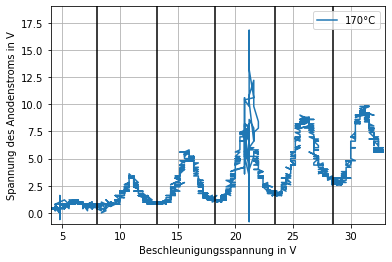

In [576]:
a=600
b=4700

pos = 1
x = hg[pos]
t = T [pos]
m = minima[pos]


x1 = 10*x["Volt"][a:b].rolling(window=w).mean()
x2 = 10*x["Volt"][a:b]
y1 = 10*x["Volt.1"][a:b].rolling(window=w).mean()
y2 = 10*x["Volt.1"][a:b]

plt.plot(x2,y2,label=f"{t}°C") 

for n in m:
    plt.plot([n,n],[-2,30],c="k") 

plt.grid()
plt.xlabel("Beschleunigungsspannung in V")
plt.ylabel("Spannung des Anodenstroms in V")
plt.legend()
axes = plt.gca()
axes.set_xlim(4,33)
axes.set_ylim(-1,19)

(-1.0, 29.0)

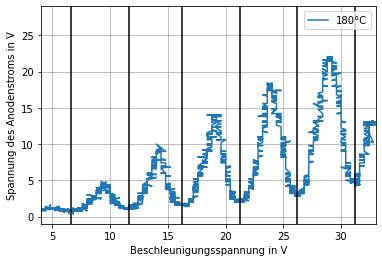

In [577]:
a=600
b=4700

pos = 2
x = hg[pos]
t = T [pos]
m = minima[pos]


x1 = 10*x["Volt"][a:b].rolling(window=w).mean()
x2 = 10*x["Volt"][a:b]
y1 = 10*x["Volt.1"][a:b].rolling(window=w).mean()
y2 = 10*x["Volt.1"][a:b]

plt.plot(x2,y2,label=f"{t}°C") 

for n in m:
    plt.plot([n,n],[-2,30],c="k") 

plt.grid()
plt.xlabel("Beschleunigungsspannung in V")
plt.ylabel("Spannung des Anodenstroms in V")
plt.legend()
axes = plt.gca()
axes.set_xlim(4,33)
axes.set_ylim(-1,29)

(-1.0, 29.0)

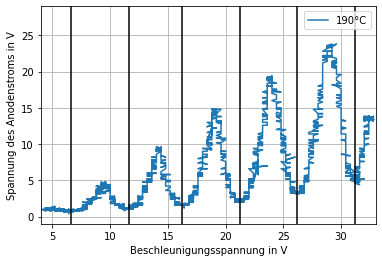

In [578]:
a=600
b=4700

pos = 3
x = hg[pos]
t = T [pos]
m = minima[pos]


x1 = 10*x["Volt"][a:b].rolling(window=w).mean()
x2 = 10*x["Volt"][a:b]
y1 = 10*x["Volt.1"][a:b].rolling(window=w).mean()
y2 = 10*x["Volt.1"][a:b]

plt.plot(x2,y2,label=f"{t}°C") 

for n in m:
    plt.plot([n,n],[-2,30],c="k") 

plt.grid()
plt.xlabel("Beschleunigungsspannung in V")
plt.ylabel("Spannung des Anodenstroms in V")
plt.legend()
axes = plt.gca()
axes.set_xlim(4,33)
axes.set_ylim(-1,29)

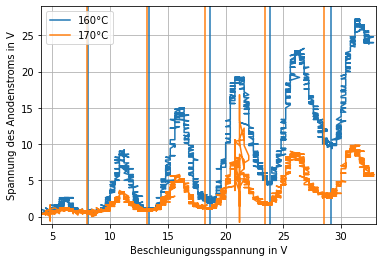

In [579]:
colors = ["tab:blue","tab:orange","tab:green","tab:red"]
for x,t,m,c in zip(hg[:2],T[:2],minima[:2],colors):
    x1 = 10*x["Volt"][a:b].rolling(window=w).mean()
    x2 = 10*x["Volt"][a:b]
    y1 = 10*x["Volt.1"][a:b].rolling(window=w).mean()
    y2 = 10*x["Volt.1"][a:b]
    # plt.plot(x1,y1,label=f"{t} Grad C") 
    plt.plot(x2,y2,label=f"{t}°C") 

    # peaks , _ = find_peaks(-y1, prominence = 0.1)
    # print(x1[peaks + a])
    # # peaks2 , _ = find_peaks(-x["Volt.1"],height=-6,prominence=2,distance=10) 
    # plt.scatter(x2[peaks + a],y2[peaks + a] + 2)
    # plt.scatter(x2[peaks + a],-y2[peaks + a])

    # for p in peaks:
    #     plt.plot([x2[p + a],x2[p + a]],[0,20],c="k")
    for n in m:
        plt.plot([n,n],[-2,30],c=c) 

plt.grid()
plt.xlabel("Beschleunigungsspannung in V")
plt.ylabel("Spannung des Anodenstroms in V")
plt.legend()
axes = plt.gca()
axes.set_xlim(4,33)
axes.set_ylim(-1,29)
plt.savefig("Bilder/fh/Hg-12.png",dpi=300)

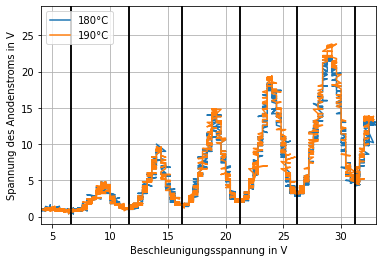

In [580]:
for x,t,m in zip(hg[2:],T[2:],minima[2:]):
    x1 = 10*x["Volt"][a:b].rolling(window=w).mean()
    x2 = 10*x["Volt"][a:b]
    y1 = 10*x["Volt.1"][a:b].rolling(window=w).mean()
    y2 = 10*x["Volt.1"][a:b]
    # plt.plot(x1,y1,label=f"{t} Grad C") 
    plt.plot(x2,y2,label=f"{t}°C") 

    # peaks , _ = find_peaks(-y1, prominence = 0.1)
    # print(x1[peaks + a])
    # # peaks2 , _ = find_peaks(-x["Volt.1"],height=-6,prominence=2,distance=10) 
    # plt.scatter(x2[peaks + a],y2[peaks + a] + 2)
    # plt.scatter(x2[peaks + a],-y2[peaks + a])

    # for p in peaks:
    #     plt.plot([x2[p + a],x2[p + a]],[0,20],c="k")
    for n in m:
        plt.plot([n,n],[-2,30],c="k") 

plt.grid()
plt.xlabel("Beschleunigungsspannung in V")
plt.ylabel("Spannung des Anodenstroms in V")
plt.legend()
axes = plt.gca()
axes.set_xlim(4,33)
axes.set_ylim(-1,29)
plt.savefig("Bilder/fh/Hg-34.png",dpi=300)

(-1.0, 29.0)

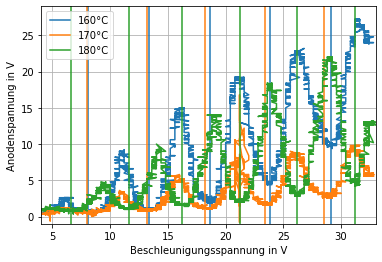

In [581]:
a=600
b=4700
for x,t,m,c in zip(hg[:3],T[:3],minima[:3],colors):
    x1 = 10*x["Volt"][a:b].rolling(window=w).mean()
    x2 = 10*x["Volt"][a:b]
    y1 = 10*x["Volt.1"][a:b].rolling(window=w).mean()
    y2 = 10*x["Volt.1"][a:b]
    # plt.plot(x1,y1,label=f"{t} Grad C") 
    plt.plot(x2,y2,label=f"{t}°C") 

    # peaks , _ = find_peaks(-y1, prominence = 0.1)
    # print(x1[peaks + a])
    # # peaks2 , _ = find_peaks(-x["Volt.1"],height=-6,prominence=2,distance=10) 
    # plt.scatter(x2[peaks + a],y2[peaks + a] + 2)
    # plt.scatter(x2[peaks + a],-y2[peaks + a])

    # for p in peaks:
    #     plt.plot([x2[p + a],x2[p + a]],[0,20],c="k")
    for n in m:
        plt.plot([n,n],[-2,30],c=c) 

plt.grid()
plt.xlabel("Beschleunigungsspannung in V")
plt.ylabel("Anodenspannung in V")
plt.legend()
axes = plt.gca()
axes.set_xlim(4,33)
axes.set_ylim(-1,29)

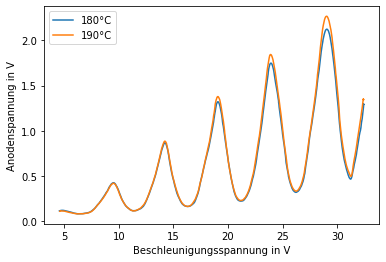

In [582]:
a=600
b=4500
for x,t in zip(hg[2:],T[2:]):
    plt.plot(10*x["Volt"][a:b].rolling(window=w).mean(),x["Volt.1"][a:b].rolling(window=w).mean(),label=f"{t}°C")       
plt.xlabel("Beschleunigungsspannung in V")
plt.ylabel("Anodenspannung in V")
plt.legend()
axes = plt.gca()
# axes.set_xlim(1,12)
# axes.set_ylim(0,3)

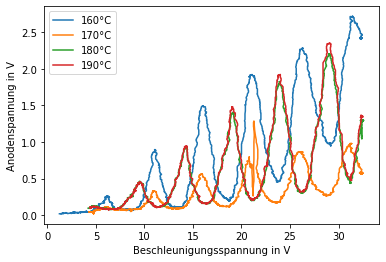

In [583]:
a=600
b=4700
w = 10
for x,t in zip(hg,T):
    plt.plot(10*x["Volt"][a:b].rolling(window=w).mean(),x["Volt.1"][a:b].rolling(window=w).mean(),label=f"{t}°C")            
    # plt.plot(10*x["Volt"][a:b],x["Volt.1"][a:b],label=f"{t} Grad C")       

plt.xlabel("Beschleunigungsspannung in V")
plt.ylabel("Anodenspannung in V")
plt.legend()
axes = plt.gca()
# axes.set_xlim(1,12)
# axes.set_ylim(0,3)

## Bestimmung gitterabstand

In [584]:
for x,t,m in zip(hg,T,minima):
    print(t,m)

160 [8.1, 13.4, 18.6, 23.8, 29.1]
170 [8, 13.2, 18.2, 23.4, 28.5]
180 [6.6, 11.6, 16.2, 21.2, 26.2, 31.2]
190 [6.6, 11.6, 16.2, 21.2, 26.2, 31.2]


In [585]:
rows = [[]]*4
label = ["160°C","170°C","180°C und 190°C",""]
for i,(lab,m) in enumerate(zip(label,minima[:3])):
    xlab = lab
    x = [0]*6
    for j in range(len(m)):
        x[j] = "\SI{" + str(m[j]) + " \pm " +  str(un) + r"}{\volt}"
    if (j==5):
        rows[i] = [xlab,x[0],x[1],x[2],x[3],x[4],x[5]]
    else:
        rows[i] = [xlab,x[0],x[1],x[2],x[3],x[4]]
    print(x1)
    
fields= ["Temperatur", "1. Ord", "2. Ord","3. Ord","4. Ord","5. Ord","6. Ord",]

filename = "Bilder/fh/hg-nminima.csv"

with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(rows)

print(rows[1])

600        NaN
601        NaN
602        NaN
603        NaN
604        NaN
         ...  
4695    32.416
4696    32.416
4697    32.416
4698    32.416
4699    32.416
Name: Volt, Length: 4100, dtype: float64
600        NaN
601        NaN
602        NaN
603        NaN
604        NaN
         ...  
4695    32.416
4696    32.416
4697    32.416
4698    32.416
4699    32.416
Name: Volt, Length: 4100, dtype: float64
600        NaN
601        NaN
602        NaN
603        NaN
604        NaN
         ...  
4695    32.416
4696    32.416
4697    32.416
4698    32.416
4699    32.416
Name: Volt, Length: 4100, dtype: float64
['170°C', '\\SI{8 \\pm 0.8}{\\volt}', '\\SI{13.2 \\pm 0.8}{\\volt}', '\\SI{18.2 \\pm 0.8}{\\volt}', '\\SI{23.4 \\pm 0.8}{\\volt}', '\\SI{28.5 \\pm 0.8}{\\volt}']


In [586]:
DEn = [0]*len(minima)
pos = [0]*len(minima)
for j,(t,m) in enumerate(zip(T,minima)):
    y = [0]*(len(m)-1)
    x = [0]*(len(m)-1)
    # print(t)
    for i in range(len((m))-1):
        y[i] = round(m[i+1]-m[i],2)
        x[i] = i+2
        # print(round(m[i+1]-m[i],2))
    DEn[j] = y
    pos[j] = x
DEn,pos

([[5.3, 5.2, 5.2, 5.3],
  [5.2, 5.0, 5.2, 5.1],
  [5.0, 4.6, 5.0, 5.0, 5.0],
  [5.0, 4.6, 5.0, 5.0, 5.0]],
 [[2, 3, 4, 5], [2, 3, 4, 5], [2, 3, 4, 5, 6], [2, 3, 4, 5, 6]])

In [608]:
l = 1.1/100
def fit(n, Ea, L):
    return Ea * ( 1 + L/l * ( 2*n -1))

[ 5.25000009e+00 -2.17578816e-11] [1.08012346e-01 2.98051200e-05]
[ 5.15500000e+00 -1.06692527e-05] [1.66358049e-01 5.51165857e-05]
[4.77999989e+00 4.60251416e-05] [2.30651100e-01 7.23684033e-05]
[4.77999989e+00 4.60251416e-05] [2.30651100e-01 7.23684033e-05]


[(-2.175788162920439e-11, 2.980511995570863e-05),
 (-1.0669252711117705e-05, 5.511658568081514e-05),
 (4.6025141559800686e-05, 7.2368403283634e-05),
 (4.6025141559800686e-05, 7.2368403283634e-05)]

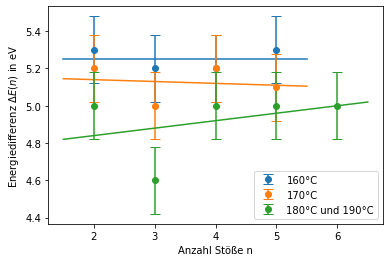

In [609]:
L = [[]]*len(pos)
Ea = [[]]*len(pos)
ue = 2*um**2
label = ["160°C","170°C","180°C und 190°C",""]
for i,(x, y,t,lab,col) in enumerate(zip(pos,DEn,T,label,colors)):
    c, cov = curve_fit(fit, x,y)
    perr = np.sqrt(np.abs(np.diag(cov)))
    print(c,perr)
    L[i] = c[1], perr[1]
    Ea[i] = c[0], perr[0]
    xf = np.linspace(1.5,x[-1]+0.5,500)
    yf = fit(xf, c[0],c[1])
    if (i<3):
        plt.errorbar(x,y,yerr=[ue]*len(y),fmt='o', capsize=5,label=lab,color=col)
        plt.plot(xf,yf,color=col)
        
plt.xlabel("Anzahl Stöße n")
plt.ylabel("Energiedifferenz $\Delta E(n)$ in eV")
plt.legend()

plt.savefig("Bilder/fh/Hg-fit.png",dpi=300)
L

In [610]:
rows = [[]]*3
label = ["160°C","170°C","180°C und 190°C",""]
for i,(lab,wegl) in enumerate(zip(label,L[:3])):
    xlab = lab
    x1 = "\SI{" + str(round(L[i][0]*1e6,2)) + " \pm " +  str(round(L[i][1]*1e6,2)) + r"}{\micro\m}"
    rows[i] = [xlab,x1]
    print(x1)
    
fields= ["Temperatur", "Freie Weglänge",]

filename = "Bilder/fh/hg-freie-weglänge.csv"

with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(rows)

print(rows[1])

\SI{-0.0 \pm 29.81}{\micro\m}
\SI{-10.67 \pm 55.12}{\micro\m}
\SI{46.03 \pm 72.37}{\micro\m}
['170°C', '\\SI{-10.67 \\pm 55.12}{\\micro\\m}']


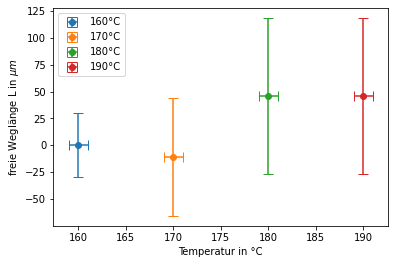

In [611]:
for a,t in zip(L,T):
    plt.errorbar(t, a[0]*1e6, yerr=a[1]*1e6,xerr=uT,fmt='o', capsize=5,label=f"{t}°C")

plt.legend()
plt.xlabel("Temperatur in °C")
plt.ylabel("freie Weglänge L in $\mu m$")
plt.savefig("Bilder/fh/Hg-freie-wl.png",dpi=300)

In [600]:
rows = [[]]*3
label = ["160°C","170°C","180°C und 190°C",""]
for i,(lab,anreg) in enumerate(zip(label,Ea[:3])):
    xlab = lab
    x1 = "\SI{" + str(round(Ea[i][0],2)) + " \pm " +  str(round(Ea[i][1],2)) + r"}{e\volt}"
    rows[i] = [xlab,x1]
    print(x1)
    
fields= ["Temperatur", "Minimale Anregungsenergie",]

filename = "Bilder/fh/hg-min-anregungsenergie.csv"

with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(rows)

print(rows[1])

\SI{5.25 \pm 0.11}{e\volt}
\SI{5.15 \pm 0.17}{e\volt}
\SI{4.78 \pm 0.23}{e\volt}
['170°C', '\\SI{5.15 \\pm 0.17}{e\\volt}']


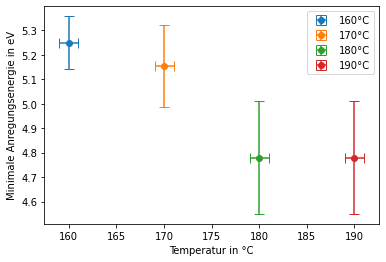

In [601]:
for a,t in zip(Ea,T):
    plt.errorbar(t, a[0], yerr=a[1],xerr=uT,fmt='o', capsize=5,label=f"{t}°C")

plt.legend()
plt.xlabel("Temperatur in °C")
plt.ylabel("Minimale Anregungsenergie in eV")
plt.savefig("Bilder/fh/Hg-min-anreg.png",dpi=300)